# Importing the Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt
import plotly.express as px
import plotly.graph_objs as go
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import *

import warnings
warnings.filterwarnings('ignore')

sns.set(style= "ticks")
plt.style.use("fivethirtyeight")

# Loading the data

In [2]:
train_df= pd.read_csv('Data/train_ctrUa4K.csv')
test_df= pd.read_csv('Data/test_lAUu6dG.csv')

In [3]:
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


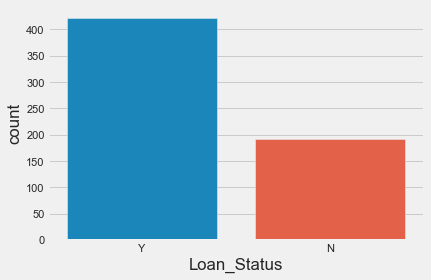

In [4]:
sns.countplot(train_df['Loan_Status'])

In [5]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

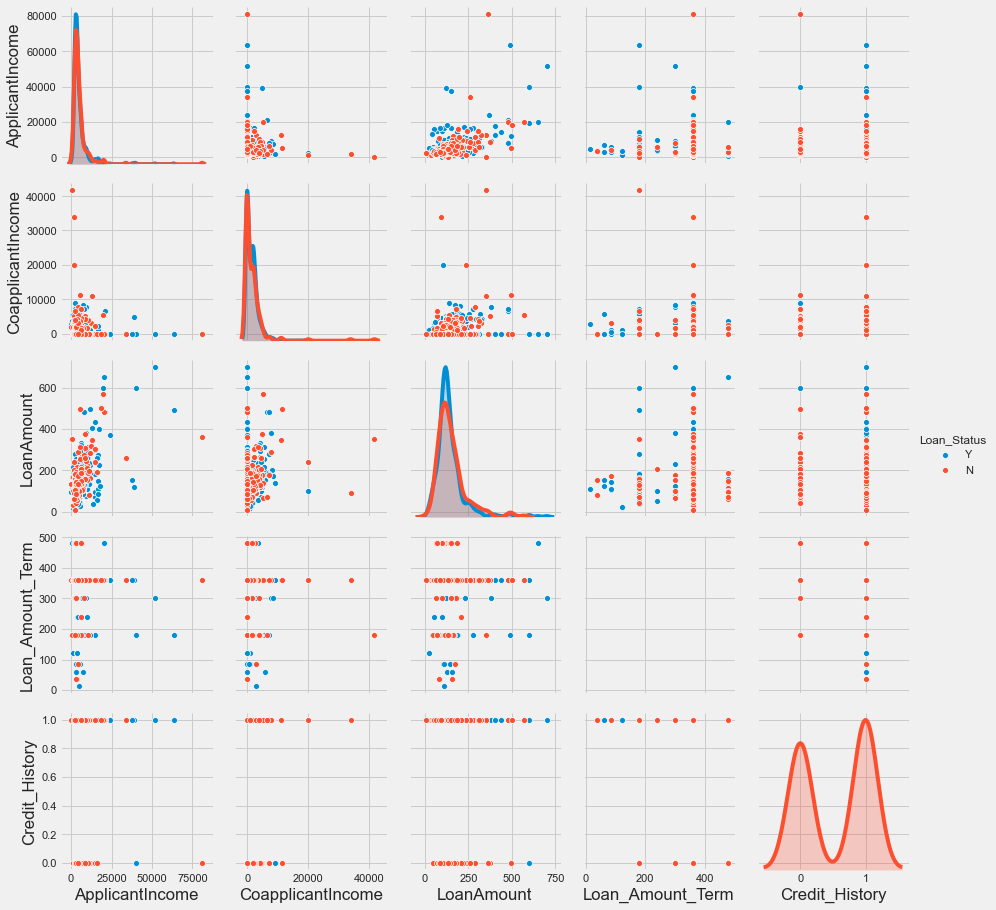

In [6]:
sns.pairplot(train_df, hue= 'Loan_Status')

In [7]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,614.0,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.00,81000.0
CoapplicantIncome,614.0,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,146.412162,85.587325,9.0,100.0,128.0,168.00,700.0
Loan_Amount_Term,600.0,342.000000,65.120410,12.0,360.0,360.0,360.00,480.0
Credit_History,564.0,0.842199,0.364878,0.0,1.0,1.0,1.00,1.0


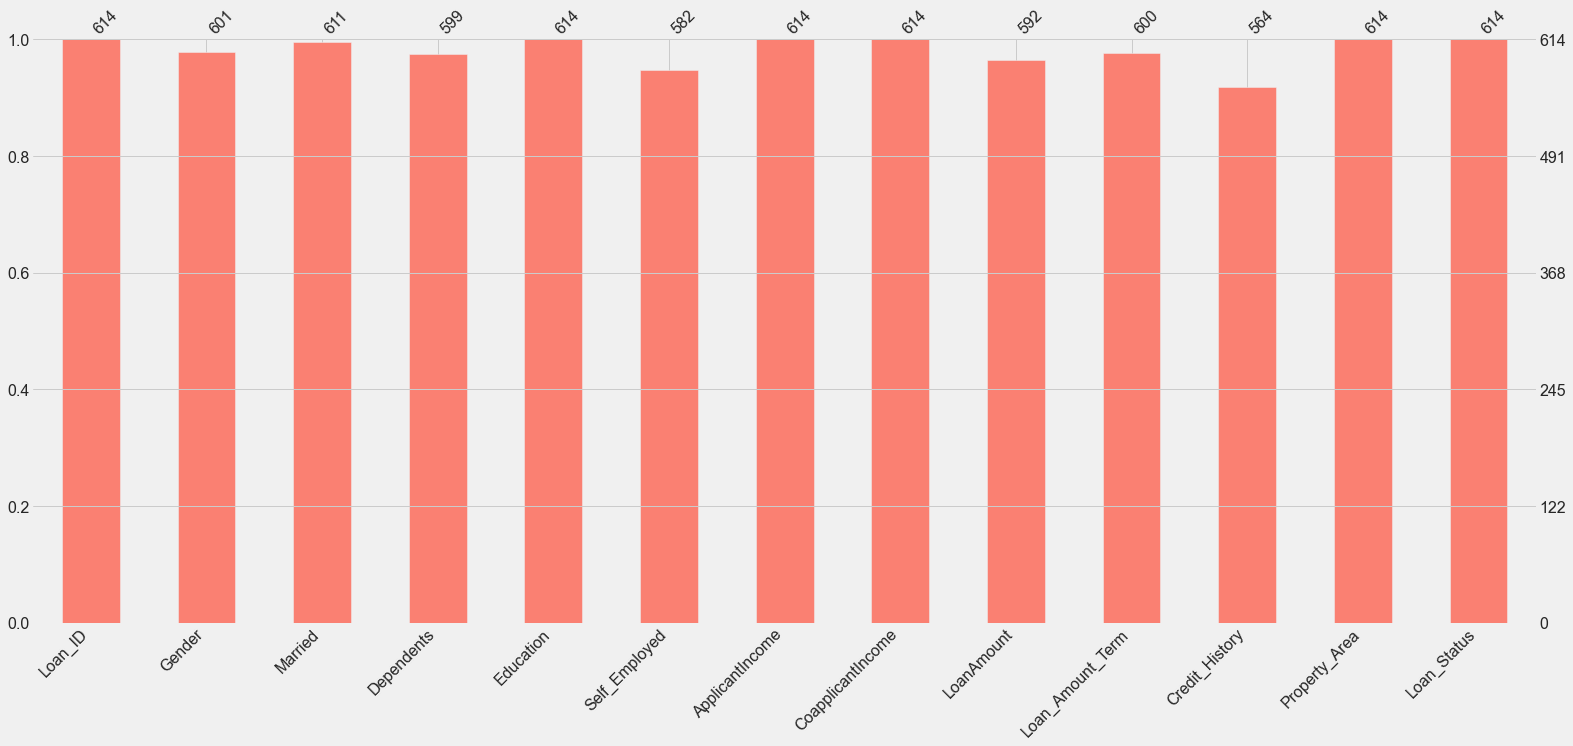

In [8]:
import missingno as mi
mi.bar(train_df, color= 'Salmon')

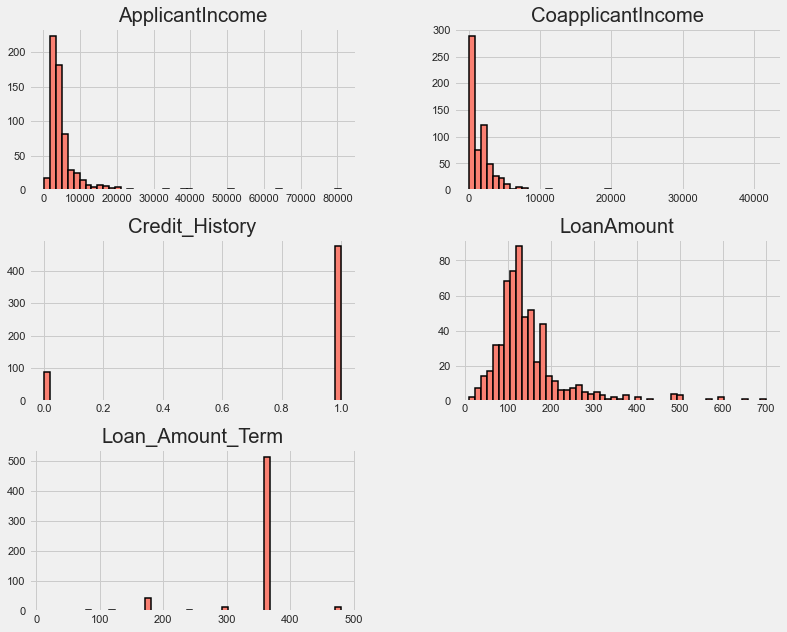

In [9]:
train_df.hist(figsize= (12,10), edgecolor= 'black', linewidth= 1.5, color= 'Salmon', bins= 50)
plt.show()

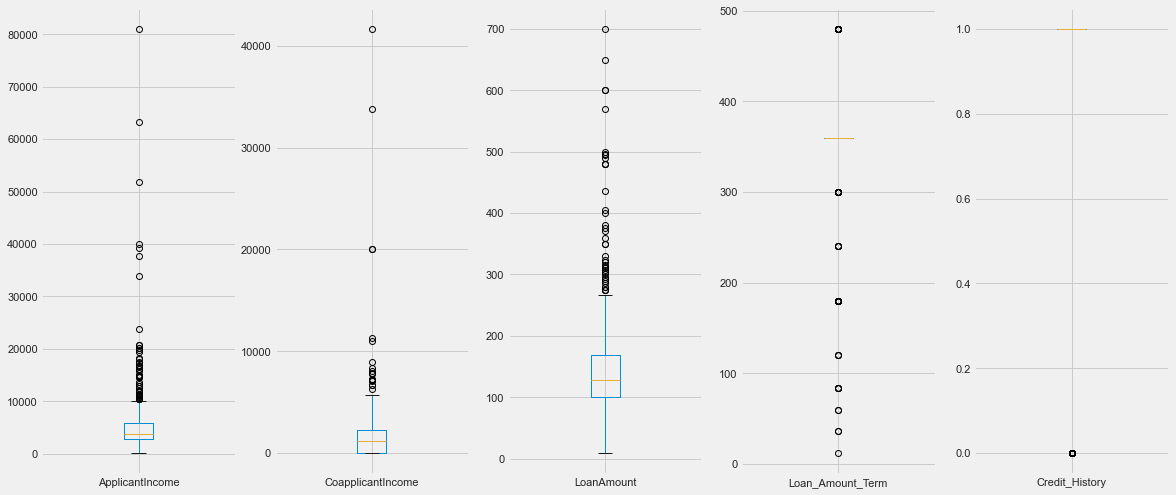

In [10]:
train_df.plot(kind= 'box', subplots= True, figsize= (18, 8))
plt.show()

# Replacing Y, N by 1, 0 respectively in target column.

In [11]:
train_df['Loan_Status']= train_df['Loan_Status'].map(dict(Y=1, N=0))

In [12]:
temp1 = train_df['Credit_History'].value_counts(ascending=True)
# temp2 = train_df.pivot_table(values='Loan_Status',index=['Credit_History'],aggfunc=lambda x: x.map({'Y':1,'N':0}).mean())
print ('Frequency Table for Credit History:') 
print (temp1)

# print ('\nProbility of getting loan for each Credit History class:')
# print (temp2)

Frequency Table for Credit History:
0.0     89
1.0    475
Name: Credit_History, dtype: int64


In [13]:
temp2= pd.pivot_table(index= 'Credit_History',values= 'Loan_Status',\
               aggfunc= 'mean', data= train_df)
temp2

,Loan_Status
Credit_History,
0.0,0.078652
1.0,0.795789


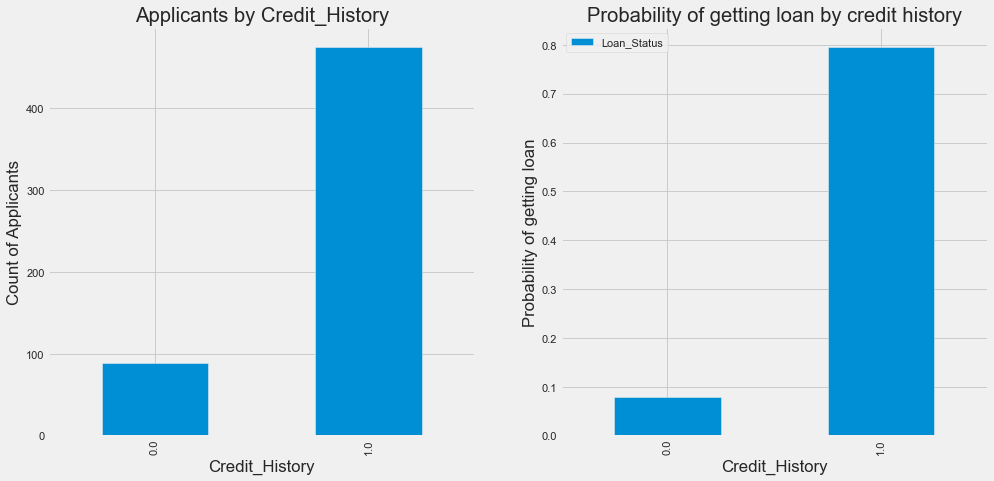

In [14]:
fig = plt.figure(figsize=(15,7))
ax1 = fig.add_subplot(1,2,1)
ax1.set_xlabel('Credit_History')
ax1.set_ylabel('Count of Applicants')
ax1.set_title("Applicants by Credit_History")
temp1.plot(kind='bar', ax= ax1)

ax2 = fig.add_subplot(1,2,2)
temp2.plot(kind = 'bar', ax= ax2)
ax2.set_xlabel('Credit_History')
ax2.set_ylabel('Probability of getting loan')
ax2.set_title("Probability of getting loan by credit history")
plt.show()

In [15]:
temp3 = pd.crosstab(train_df['Credit_History'], train_df['Loan_Status'])
temp3

Loan_Status,0,1
Credit_History,,
0.0,82,7
1.0,97,378


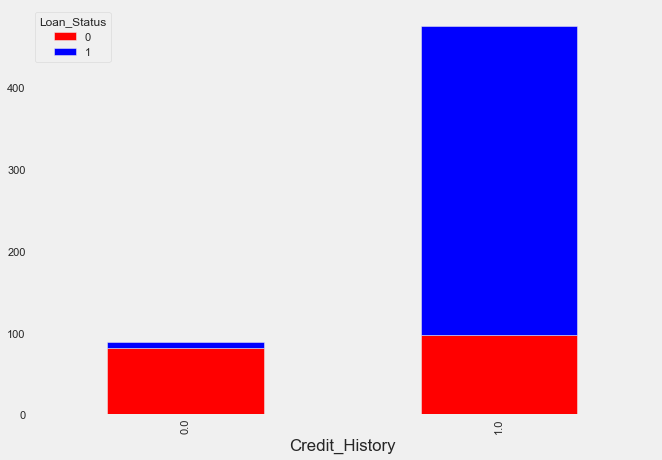

In [16]:
temp3.plot(kind= 'bar', stacked= True, color= ['red','blue'], grid= False, figsize=(10, 7))

## Filling missing value

In [17]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [18]:
train_df['Self_Employed'].fillna('No',inplace=True)

In [19]:
train_df['Gender'].fillna(train_df['Gender'].mode()[0], inplace=True)
train_df['Married'].fillna(train_df['Married'].mode()[0], inplace=True)
train_df['Dependents'].fillna(train_df['Dependents'].mode()[0], inplace=True)
train_df['Loan_Amount_Term'].fillna(train_df['Loan_Amount_Term'].mode()[0], inplace=True)
train_df['Credit_History'].fillna(train_df['Credit_History'].mode()[0], inplace=True)

In [20]:
train_df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status            int64
dtype: object

In [21]:
table = train_df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,113.0
Yes,157.5,130.0


In [22]:
# Define function to return value of this pivot_table
def median_replace(x):
    return table.loc[x['Self_Employed'], x['Education']]

# Replace missing values
train_df['LoanAmount'].fillna(train_df[train_df['LoanAmount'].isnull()].apply(median_replace, axis=1), inplace=True)

In [23]:
train_df['LoanAmount'].isnull().sum()

0

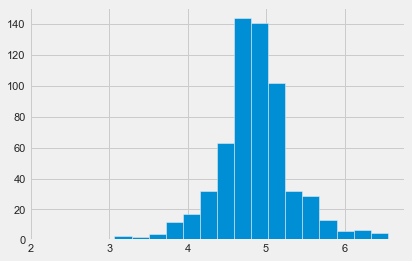

In [24]:
train_df['Loan_Amount_log'] = np.log(train_df['LoanAmount'])
train_df['Loan_Amount_log'].hist(bins=20)

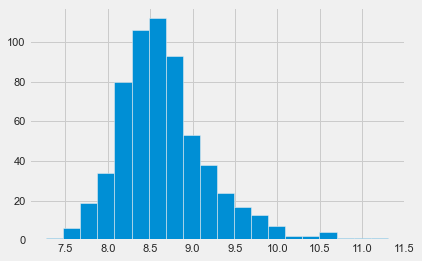

In [25]:
train_df['Total_Income'] = train_df['ApplicantIncome'] + train_df['CoapplicantIncome']
train_df['Total_Income_log'] = np.log(train_df['Total_Income'])
train_df.drop(['ApplicantIncome', 'CoapplicantIncome'], axis= 1, inplace= True)
train_df['Total_Income_log'].hist(bins=20)

In [26]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_log,Total_Income,Total_Income_log
0,LP001002,Male,No,0,Graduate,No,130.0,360.0,1.0,Urban,1,4.867534,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,0,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,1,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,1,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,1,4.948760,6000.0,8.699515


## Creating Debt_Income_Ratio column

In [27]:
train_df['Debt_Income_Ratio'] = train_df['Total_Income'] / train_df['LoanAmount']
train_df.drop(['LoanAmount', 'Total_Income'], axis= 1, inplace= True)
train_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_log,Total_Income_log,Debt_Income_Ratio
0,LP001002,Male,No,0,Graduate,No,360.0,1.0,Urban,1,4.867534,8.674026,44.992308
1,LP001003,Male,Yes,1,Graduate,No,360.0,1.0,Rural,0,4.852030,8.714568,47.585938
2,LP001005,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,1,4.189655,8.006368,45.454545
3,LP001006,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,1,4.787492,8.505323,41.175000
4,LP001008,Male,No,0,Graduate,No,360.0,1.0,Urban,1,4.948760,8.699515,42.553191
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,360.0,1.0,Rural,1,4.262680,7.972466,40.845070
610,LP002979,Male,Yes,3+,Graduate,No,180.0,1.0,Rural,1,3.688879,8.320205,102.650000
611,LP002983,Male,Yes,1,Graduate,No,360.0,1.0,Urban,1,5.533389,9.025456,32.853755
612,LP002984,Male,Yes,2,Graduate,No,360.0,1.0,Urban,1,5.231109,8.933664,40.550802


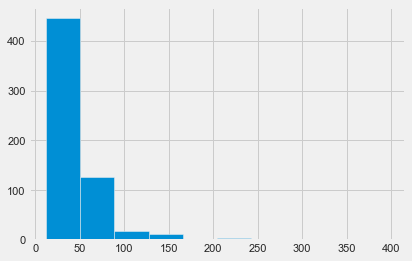

In [28]:
train_df['Debt_Income_Ratio'].hist()

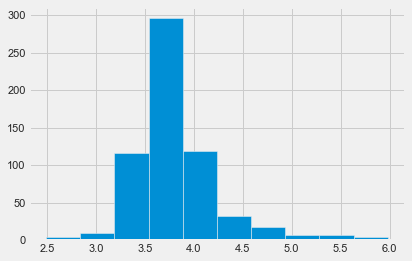

In [29]:
train_df['Debt_Income_Ratio_log']= np.log(train_df['Debt_Income_Ratio'])
train_df['Debt_Income_Ratio_log'].hist()

In [30]:
train_df[60:70]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_log,Total_Income_log,Debt_Income_Ratio,Debt_Income_Ratio_log
60,LP001205,Male,Yes,0,Graduate,No,360.0,1.0,Urban,1,4.787492,8.747670,52.466667,3.960178
61,LP001206,Male,Yes,3+,Graduate,No,360.0,1.0,Urban,1,4.595120,8.015988,30.595960,3.420868
62,LP001207,Male,Yes,0,Not Graduate,Yes,180.0,0.0,Rural,0,5.105945,8.709135,36.715152,3.603190
63,LP001213,Male,Yes,1,Graduate,No,360.0,0.0,Rural,0,4.867534,8.506132,38.038462,3.638598
64,LP001222,Female,No,0,Graduate,No,360.0,0.0,Semiurban,0,4.753590,8.334712,35.913793,3.581121
65,LP001225,Male,Yes,0,Graduate,No,360.0,1.0,Semiurban,0,5.552960,9.241936,40.003876,3.688976
66,LP001228,Male,No,0,Not Graduate,No,180.0,0.0,Urban,0,4.836282,8.604105,43.285714,3.767823
67,LP001233,Male,Yes,1,Graduate,No,360.0,1.0,Urban,1,5.743003,9.282661,34.455128,3.539658
68,LP001238,Male,Yes,3+,Not Graduate,Yes,60.0,1.0,Urban,1,4.828314,8.867850,56.800000,4.039536
69,LP001241,Female,No,0,Graduate,No,360.0,0.0,Semiurban,0,4.912655,8.366370,31.617647,3.453715


In [31]:
temp= train_df.copy()

In [32]:
temp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loan_Amount_log,Total_Income_log,Debt_Income_Ratio,Debt_Income_Ratio_log
0,LP001002,Male,No,0,Graduate,No,360.0,1.0,Urban,1,4.867534,8.674026,44.992308,3.806492
1,LP001003,Male,Yes,1,Graduate,No,360.0,1.0,Rural,0,4.852030,8.714568,47.585938,3.862537
2,LP001005,Male,Yes,0,Graduate,Yes,360.0,1.0,Urban,1,4.189655,8.006368,45.454545,3.816713
3,LP001006,Male,Yes,0,Not Graduate,No,360.0,1.0,Urban,1,4.787492,8.505323,41.175000,3.717831
4,LP001008,Male,No,0,Graduate,No,360.0,1.0,Urban,1,4.948760,8.699515,42.553191,3.750755


In [33]:
temp['Very_Short_Term'] = temp['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
temp['Short_Term'] = temp['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
temp['Long_Term'] = temp['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
temp['Very_Long_Term'] = temp['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)
temp.drop(['Loan_Amount_Term', 'Very_Short_Term'], axis=1, inplace=True)

In [34]:
temp.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Loan_Amount_log,Total_Income_log,Debt_Income_Ratio,Debt_Income_Ratio_log,Short_Term,Long_Term,Very_Long_Term
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,1,4.867534,8.674026,44.992308,3.806492,0,0,1
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,8.714568,47.585938,3.862537,0,0,1
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,8.006368,45.454545,3.816713,0,0,1
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4.787492,8.505323,41.175000,3.717831,0,0,1
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1,4.948760,8.699515,42.553191,3.750755,0,0,1


In [35]:
temp= pd.get_dummies(temp, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'],
                     drop_first= True)
temp

,Loan_ID,Credit_History,Loan_Status,Loan_Amount_log,Total_Income_log,Debt_Income_Ratio,Debt_Income_Ratio_log,Short_Term,Long_Term,Very_Long_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1.0,1,4.867534,8.674026,44.992308,3.806492,0,0,1,1,0,0,0,0,0,0,0,1
1,LP001003,1.0,0,4.852030,8.714568,47.585938,3.862537,0,0,1,1,1,1,0,0,0,0,0,0
2,LP001005,1.0,1,4.189655,8.006368,45.454545,3.816713,0,0,1,1,1,0,0,0,0,1,0,1
3,LP001006,1.0,1,4.787492,8.505323,41.175000,3.717831,0,0,1,1,1,0,0,0,1,0,0,1
4,LP001008,1.0,1,4.948760,8.699515,42.553191,3.750755,0,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1.0,1,4.262680,7.972466,40.845070,3.709786,0,0,1,0,0,0,0,0,0,0,0,0
610,LP002979,1.0,1,3.688879,8.320205,102.650000,4.631325,0,1,0,1,1,0,0,1,0,0,0,0
611,LP002983,1.0,1,5.533389,9.025456,32.853755,3.492066,0,0,1,1,1,1,0,0,0,0,0,1
612,LP002984,1.0,1,5.231109,8.933664,40.550802,3.702556,0,0,1,1,1,0,1,0,0,0,0,1


In [36]:
temp.head()

,Loan_ID,Credit_History,Loan_Status,Loan_Amount_log,Total_Income_log,Debt_Income_Ratio,Debt_Income_Ratio_log,Short_Term,Long_Term,Very_Long_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,LP001002,1.0,1,4.867534,8.674026,44.992308,3.806492,0,0,1,1,0,0,0,0,0,0,0,1
1,LP001003,1.0,0,4.852030,8.714568,47.585938,3.862537,0,0,1,1,1,1,0,0,0,0,0,0
2,LP001005,1.0,1,4.189655,8.006368,45.454545,3.816713,0,0,1,1,1,0,0,0,0,1,0,1
3,LP001006,1.0,1,4.787492,8.505323,41.175000,3.717831,0,0,1,1,1,0,0,0,1,0,0,1
4,LP001008,1.0,1,4.948760,8.699515,42.553191,3.750755,0,0,1,1,0,0,0,0,0,0,0,1


In [37]:
X= temp.drop(['Loan_ID', 'Loan_Status', 'Debt_Income_Ratio'], axis= 1)

In [38]:
X

,Credit_History,Loan_Amount_log,Total_Income_log,Debt_Income_Ratio_log,Short_Term,Long_Term,Very_Long_Term,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.867534,8.674026,3.806492,0,0,1,1,0,0,0,0,0,0,0,1
1,1.0,4.852030,8.714568,3.862537,0,0,1,1,1,1,0,0,0,0,0,0
2,1.0,4.189655,8.006368,3.816713,0,0,1,1,1,0,0,0,0,1,0,1
3,1.0,4.787492,8.505323,3.717831,0,0,1,1,1,0,0,0,1,0,0,1
4,1.0,4.948760,8.699515,3.750755,0,0,1,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,4.262680,7.972466,3.709786,0,0,1,0,0,0,0,0,0,0,0,0
610,1.0,3.688879,8.320205,4.631325,0,1,0,1,1,0,0,1,0,0,0,0
611,1.0,5.533389,9.025456,3.492066,0,0,1,1,1,1,0,0,0,0,0,1
612,1.0,5.231109,8.933664,3.702556,0,0,1,1,1,0,1,0,0,0,0,1


In [39]:
y= temp['Loan_Status']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=42, stratify= y)

In [41]:
# Cross Validation on all models
# importing all the required ML packages
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm #support vector Machine
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB, BernoulliNB #Naive bayes
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score

accuracy=[]
classifiers= ['Radial SVM', 'Linear SVM', 'Logistic Regression', 'Decision Tree', 'KNN',\
              'Gaussian Naive Bayes', 'Bernoulli Naive Bayes','Random Forest', 'Extra Trees','AdaBoost', 'Gradient Boost', 'Bagging']

cv= StratifiedKFold(n_splits= 5)
model= [svm.SVC(kernel= 'rbf', C= 1, gamma= 0.1), svm.SVC(kernel= 'linear', C= 0.1, gamma= 0.1),\
        LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), GaussianNB(),\
        BernoulliNB(), RandomForestClassifier(), ExtraTreesClassifier(),AdaBoostClassifier(),\
        GradientBoostingClassifier(), BaggingClassifier()]

for i in model:
    score= cross_val_score(i, X, y,cv=cv, scoring= 'accuracy')
    accuracy.append(score.mean())

model_dataframe = pd.DataFrame({'Cross validation accuracy': accuracy}, index= classifiers)
display(model_dataframe)

,Cross validation accuracy
Radial SVM,0.809463
Linear SVM,0.809463
Logistic Regression,0.809463
Decision Tree,0.692190
KNN,0.734546
Gaussian Naive Bayes,0.689951
Bernoulli Naive Bayes,0.807837
Random Forest,0.785033
Extra Trees,0.770372
AdaBoost,0.791523


In [42]:
def models(X_train, y_train, X_test, y_test):
    #importing all the required ML packages
    from sklearn.linear_model import LogisticRegression #logistic regression
    from sklearn import svm #support vector Machine
    from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier #Random Forest & Extra Trees
    from sklearn.neighbors import KNeighborsClassifier #KNN
    from sklearn.naive_bayes import GaussianNB, BernoulliNB #Naive bayes
    
    from sklearn.model_selection import train_test_split #training and testing data split
    from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score

    accuracy=[]
    f1=[]
    precision=[]
    roc=[]
    
    classifiers= ['Radial SVM', 'Linear SVM', 'Logistic Regression', 'Decision Tree', 'KNN',\
                  'Gaussian Naive Bayes', 'Bernoulli Naive Bayes','Random Forest', 'Extra Trees']
    model= [svm.SVC(kernel='rbf',C=1,gamma=0.1), svm.SVC(kernel='linear',C=0.1,gamma=0.1),\
            LogisticRegression(), DecisionTreeClassifier(), KNeighborsClassifier(), GaussianNB(), BernoulliNB(),\
            RandomForestClassifier(n_estimators=100), ExtraTreesClassifier()]
    
    for i in model:
        classifier = i
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy.append(accuracy_score(y_pred, y_test))
        f1.append(f1_score(y_pred, y_test))
        roc.append(roc_auc_score(y_pred, y_test))
        precision.append(precision_score(y_pred, y_test))
        
    model_dataframe = pd.DataFrame({'Accuracy': accuracy, 'F1-Score': f1, 'AUC': roc, 'Precision': precision}, index= classifiers)
    display(model_dataframe)

In [43]:
models(X_train, y_train, X_test, y_test)

,Accuracy,F1-Score,AUC,Precision
Radial SVM,0.848649,0.899281,0.884496,0.984252
Linear SVM,0.848649,0.899281,0.884496,0.984252
Logistic Regression,0.848649,0.899281,0.884496,0.984252
Decision Tree,0.681081,0.757202,0.642929,0.724409
KNN,0.762162,0.847222,0.774715,0.960630
Gaussian Naive Bayes,0.783784,0.849624,0.754301,0.889764
Bernoulli Naive Bayes,0.827027,0.883212,0.832617,0.952756
Random Forest,0.821622,0.873563,0.797922,0.897638
Extra Trees,0.794595,0.853846,0.763447,0.874016


In [44]:
models(X_train, y_train, X_test, y_test)

,Accuracy,F1-Score,AUC,Precision
Radial SVM,0.848649,0.899281,0.884496,0.984252
Linear SVM,0.848649,0.899281,0.884496,0.984252
Logistic Regression,0.848649,0.899281,0.884496,0.984252
Decision Tree,0.708108,0.782258,0.666451,0.763780
KNN,0.762162,0.847222,0.774715,0.960630
Gaussian Naive Bayes,0.783784,0.849624,0.754301,0.889764
Bernoulli Naive Bayes,0.827027,0.883212,0.832617,0.952756
Random Forest,0.837838,0.885496,0.819630,0.913386
Extra Trees,0.810811,0.865900,0.784387,0.889764


Accuracy is 0.8486486486486486

F1-score is 0.8992805755395684

Confussion Matrix:
[[ 32  26]
 [  2 125]]

classification Report:
               precision    recall  f1-score   support

           0       0.94      0.55      0.70        58
           1       0.83      0.98      0.90       127

    accuracy                           0.85       185
   macro avg       0.88      0.77      0.80       185
weighted avg       0.86      0.85      0.84       185




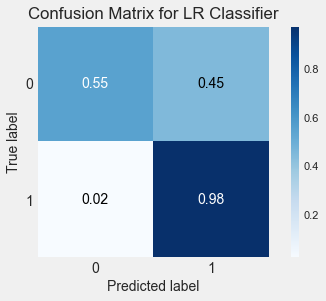

In [45]:
lr = LogisticRegression(random_state= 101)
lr.fit(X_train, y_train)
y_pred_lr= lr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_lr)
f1 = f1_score(y_test, y_pred_lr)
conf_mat = (confusion_matrix(y_test, y_pred_lr))
class_report = classification_report(y_test, y_pred_lr)

print(f'Accuracy is {accuracy}')
print(f'\nF1-score is {f1}')
print(f'\nConfussion Matrix:\n{conf_mat}')
print(f'\nclassification Report:\n {class_report}\n')
# plot confusion matrix for xgb_classifier
skplt.metrics.plot_confusion_matrix(y_test, y_pred_lr, title="Confusion Matrix for LR Classifier", normalize= True)

In [46]:
roc_auc_score(y_test, y_pred_lr)

0.7679880532174858

# Prediction on test data

In [47]:
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [48]:
final_submission= test_df[['Loan_ID']]
test_df= test_df.drop('Loan_ID', axis= 1)

In [49]:
test_df.isnull().sum()

Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [50]:
test_df['Gender'].fillna(test_df['Gender'].mode()[0], inplace=True)
test_df['Dependents'].fillna(test_df['Dependents'].mode()[0], inplace=True)
test_df['Self_Employed'].fillna('No', inplace=True)
test_df['Credit_History'].fillna(test_df['Credit_History'].mode()[0], inplace=True)
test_df['Loan_Amount_Term'].fillna(test_df['Loan_Amount_Term'].mode()[0], inplace=True)

In [51]:
table = test_df.pivot_table(values='LoanAmount', index='Self_Employed' ,columns='Education', aggfunc=np.median)
table

Education,Graduate,Not Graduate
Self_Employed,,
No,130.0,120.0
Yes,137.0,119.0


In [52]:
# Define function to return value of this pivot_table
def median_replace(x):
    return table.loc[x['Self_Employed'], x['Education']]

# Replace missing values
test_df['LoanAmount'].fillna(test_df[test_df['LoanAmount'].isnull()].apply(median_replace, axis=1), inplace=True)

In [53]:
test_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [54]:
test_df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [55]:
test_df['Loan_Amount_log'] = np.log(test_df['LoanAmount'])
test_df['Total_Income'] = test_df['ApplicantIncome'] + test_df['CoapplicantIncome']
test_df['Total_Income_log'] = np.log(test_df['Total_Income'])
test_df['Debt_Income_Ratio'] = test_df['Total_Income'] / test_df['LoanAmount']
test_df['Debt_Income_Ratio_log']= test_df['Total_Income_log'] / test_df['Loan_Amount_log']

test_df['Very_Short_Term'] = test_df['Loan_Amount_Term'].map(lambda t: 1 if t<=60 else 0)
test_df['Short_Term'] = test_df['Loan_Amount_Term'].map(lambda t: 1 if t>60 and t<180 else 0)
test_df['Long_Term'] = test_df['Loan_Amount_Term'].map(lambda t: 1 if t>=180 and t<=300  else 0)
test_df['Very_Long_Term'] = test_df['Loan_Amount_Term'].map(lambda t: 1 if t>300 else 0)

test_df.drop(['ApplicantIncome', 'CoapplicantIncome','LoanAmount', 'Total_Income', 'Debt_Income_Ratio', 'Loan_Amount_Term', 'Very_Short_Term'],\
               axis= 1, inplace= True)

test_df= pd.get_dummies(test_df, columns=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area'],
                          drop_first= True)

In [56]:
prediction= lr.predict(test_df)

In [57]:
final_submission['Loan_Status']= prediction

In [58]:
final_submission

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
...,...,...
362,LP002971,1
363,LP002975,1
364,LP002980,1
365,LP002986,1


In [59]:
final_submission['Loan_Status'].value_counts()

1    304
0     63
Name: Loan_Status, dtype: int64

In [60]:
final_submission['Loan_Status']= final_submission['Loan_Status'].map({1:'Y', 0:'N'}).astype(str)

In [61]:
final_submission

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
...,...,...
362,LP002971,Y
363,LP002975,Y
364,LP002980,Y
365,LP002986,Y


In [62]:
final_submission.to_csv('final_submission.csv', index= False)